In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

Accuracy: 0.7843137254901961
Classification Report:
              precision    recall  f1-score   support

          OE       0.92      0.72      0.81        32
          RE       0.65      0.89      0.76        19

    accuracy                           0.78        51
   macro avg       0.79      0.81      0.78        51
weighted avg       0.82      0.78      0.79        51



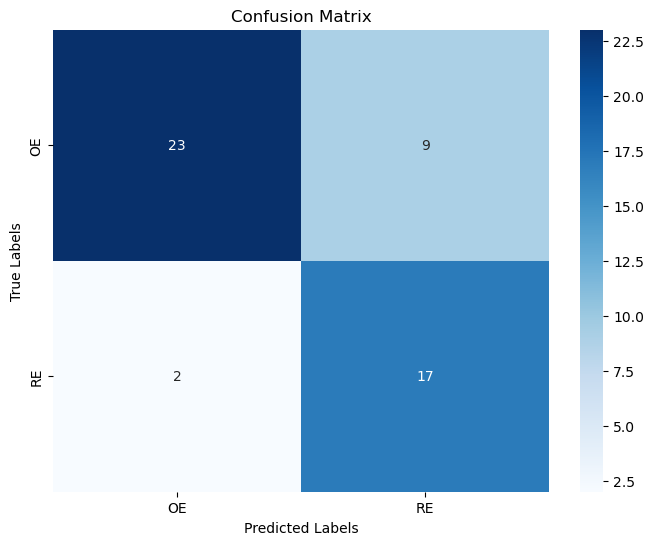

In [2]:
# Funktion zum Einlesen der Spektren aus den CSV-Dateien
def read_spectra_from_folder(folder_path, max_length=None):
    spectra = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            data = pd.read_csv(os.path.join(folder_path, file), header=None)
            # Überprüfen, ob die Daten eindimensional sind
            if data.shape[1] == 1:
                spectrum = data.values.flatten()
                # Auffüllen oder Kürzen auf maximale Länge
                if max_length is not None:
                    if len(spectrum) < max_length:
                        spectrum = np.pad(spectrum, (0, max_length - len(spectrum)), mode='constant')
                    elif len(spectrum) > max_length:
                        spectrum = spectrum[:max_length]
                spectra.append(spectrum)
                # Extrahiere die Klassen (OE oder RE) aus dem Dateinamen
                if 'OE' in file:
                    labels.append('OE')
                elif 'RE' in file:
                    labels.append('RE')
                else:
                    labels.append('Unknown')
            else:
                print(f"Die Datei {file} enthält nicht die erwarteten Daten.")
    return spectra, labels

# Lade die Spektren aus dem Ordner und stelle sicher, dass alle Spektren die gleiche Länge haben
max_length = 2523  # Beispiel: feste maximale Länge der Spektren
spectra, labels = read_spectra_from_folder("/Users/leokavallaris/FTIR ATR/Spectra OE RE/122", max_length=max_length)

# Teile die Daten in Trainings- und Testsets auf
if spectra and labels:
    X_train, X_test, y_train, y_test = train_test_split(spectra, labels, test_size=0.2, random_state=30)
    
    # ... (your code up to the model training part)

    model = LogisticRegression(max_iter=10000)  # Increase max_iter
    model.fit(X_train, y_train)

    # Mache Vorhersagen auf dem Testset
    predictions = model.predict(X_test)

    # Auswertung der Modellleistung
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Konfusionsmatrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['OE', 'RE'], yticklabels=['OE', 'RE'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [3]:
if spectra and labels:
    X_train, X_test, y_train, y_test = train_test_split(spectra, labels, test_size=0.2, random_state=42)
    
    # Initialisieren Sie das Modell
    model = LogisticRegression(max_iter=1000)  # Increase max_iter

    # Führen Sie eine 5-Fold Cross-Validation durch
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)

    # Trainieren Sie das Modell auf dem gesamten Trainingsdatensatz
    model.fit(X_train, y_train)

    # Mache Vorhersagen auf dem Testset
    predictions = model.predict(X_test)

    # Auswertung der Modellleistung auf dem Testset
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Berechnen Sie den Mittelwert und die Standardabweichung der Cross-Validation-Scores
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    
    # Geben Sie die Ergebnisse aus
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_mean)
    print("Standard Deviation of Cross-Validation Scores:", cv_std)

Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

          OE       0.86      0.76      0.81        25
          RE       0.79      0.88      0.84        26

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51

Cross-Validation Scores: [0.76190476 0.57142857 0.71428571 0.71428571 0.95       0.8
 0.85       0.8        0.6        0.75      ]
Mean Cross-Validation Score: 0.7511904761904761
Standard Deviation of Cross-Validation Scores: 0.10586138414483925


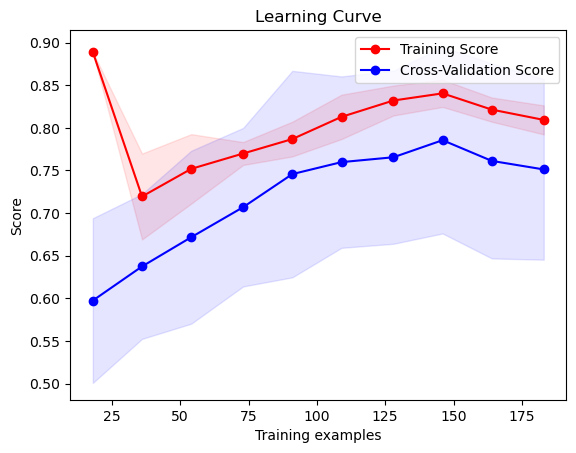

In [4]:
from sklearn.model_selection import learning_curve

# Definieren Sie die Größen des Trainingsdatensatzes für die Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

# Berechnen Sie den Mittelwert und die Standardabweichung der Scores für die Trainings- und Testdaten
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotten der Learning Curve mit Training Score und Cross-Validation Score
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [54]:
import shap

Unable to plot waterfall due to missing base_values.


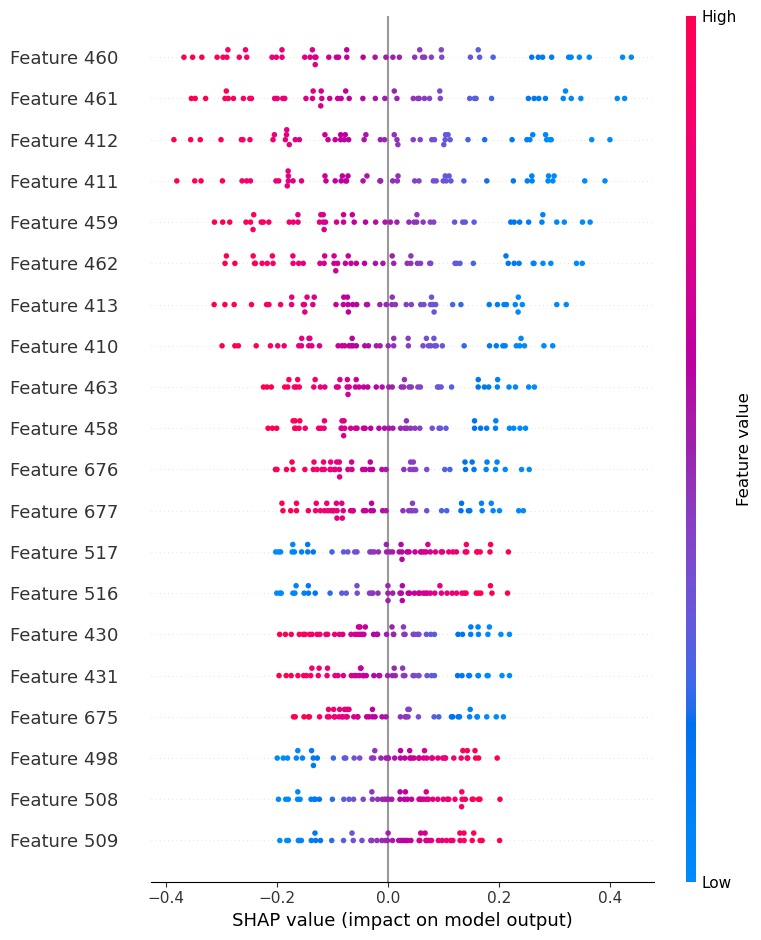

In [55]:
import shap

# Convert spectra to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Initialisieren Sie den Explainer mit Ihrem trainierten Modell
explainer = shap.LinearExplainer(model, X_train)

# Berechnen Sie die SHAP-Werte für Ihre Testdaten
shap_values = explainer.shap_values(X_test)

# Wrap the SHAP values in an Explanation object
shap_explanation = shap.Explanation(shap_values, feature_names=None)

# Visualisieren Sie die SHAP-Werte für die erste Vorhersage
if shap_explanation.base_values is not None:
    shap.plots.waterfall(shap_explanation[0])
else:
    print("Unable to plot waterfall due to missing base_values.")

# Um die Bedeutung der Merkmale global zu verstehen, können Sie einen Überblick über alle Datenpunkte anzeigen
shap.summary_plot(shap_explanation, X_test)



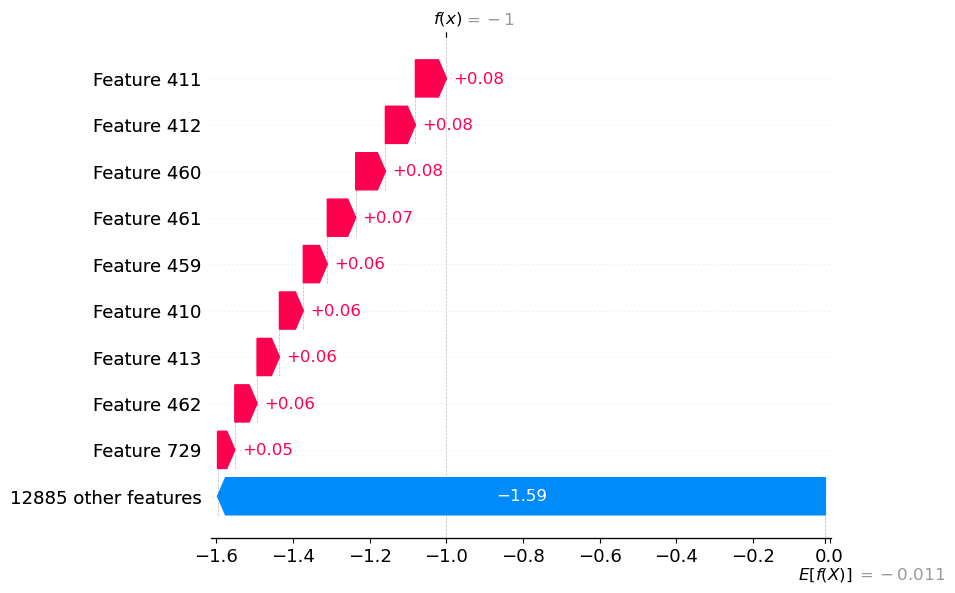

In [56]:


# Convert spectra to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Initialize the Linear Explainer
explainer = shap.LinearExplainer(model, X_train)

# Calculate the SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Calculate the base values
base_values = explainer.expected_value

# Create the Explanation object
shap_explanation = shap.Explanation(shap_values, base_values=base_values, feature_names=None)

# Visualize the SHAP values for the first prediction
shap.plots.waterfall(shap_explanation[0])

In [57]:
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of shap_values: (51, 12894)
Shape of X_test: (51, 12894)


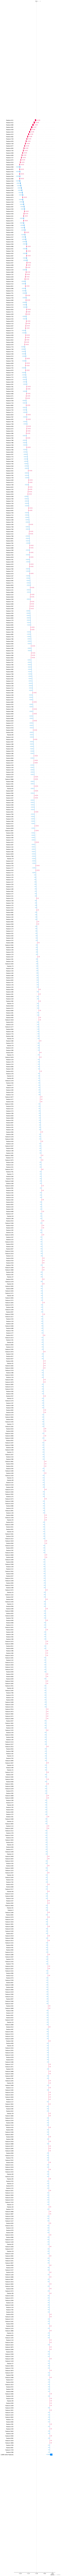

In [58]:


# Convert spectra to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Initialize the Linear Explainer
explainer = shap.LinearExplainer(model, X_train)

# Calculate the SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Calculate the base values
base_values = explainer.expected_value

# Create the Explanation object
shap_explanation = shap.Explanation(shap_values, base_values=base_values, feature_names=None)

# Sort the SHAP values in descending order
sorted_shap_values = np.argsort(-np.abs(shap_values[0]))

# Display the Waterfall plot for the top 10 features
shap.plots.waterfall(shap_explanation[0], max_display=1000)

In [61]:
import shap
import numpy as np

# Convert spectra to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Initialize the Linear Explainer
explainer = shap.LinearExplainer(model, X_train)

# Calculate the SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Sort the SHAP values in descending order
sorted_shap_values = np.argsort(-np.abs(shap_values[0]))

# Get the indices of the top 5 features
top_feature_indices = sorted_shap_values[:5]

# Map the feature indices to the corresponding wavelengths
top_wavelengths = [1800 - (i * (1800 - 900) / 2523) for i in top_feature_indices]

print("The top 5 wavelengths with the greatest influence are:")
for wavelength in top_wavelengths:
    print(f"{wavelength:.2f} cm-1")

The top 5 wavelengths with the greatest influence are:
1653.39 nm
1653.03 nm
1635.91 nm
1635.55 nm
1636.27 nm


In [27]:
!pip install scikit-optimize

  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/90/0e/15deb91b3db0003843e34e72fa865e1d92013781d986fdc65483c99a9f69/scikit_optimize-0.10.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/70/d9/6fdc01cee01fe56fddfd46892d9846ebb53a5f8eb78056955c516eef42c5/pyaml-24.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 4.8 MB/s eta 0:00:00


In [32]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV



In [35]:

# Funktion zum Einlesen der Spektren aus den CSV-Dateien
def read_spectra_from_folder(folder_path, max_length=None):
    spectra = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            data = pd.read_csv(os.path.join(folder_path, file), header=None)
            # Überprüfen, ob die Daten eindimensional sind
            if data.shape[1] == 1:
                spectrum = data.values.flatten()
                # Auffüllen oder Kürzen auf maximale Länge
                if max_length is not None:
                    if len(spectrum) < max_length:
                        spectrum = np.pad(spectrum, (0, max_length - len(spectrum)), mode='constant')
                    elif len(spectrum) > max_length:
                        spectrum = spectrum[:max_length]
                spectra.append(spectrum)
                # Extrahiere die Klassen (OE oder RE) aus dem Dateinamen
                if 'OE' in file:
                    labels.append('OE')
                elif 'RE' in file:
                    labels.append('RE')
                else:
                    labels.append('Unknown')
            else:
                print(f"Die Datei {file} enthält nicht die erwarteten Daten.")
    return spectra, labels

# Lade die Spektren aus dem Ordner und stelle sicher, dass alle Spektren die gleiche Länge haben
max_length = 12894  # Beispiel: feste maximale Länge der Spektren
spectra, labels = read_spectra_from_folder("/Users/leokavallaris/FTIR ATR/Spectra OE RE/122", max_length=max_length)

# Teile die Daten in Trainings- und Testsets auf
if spectra and labels:
    X_train, X_test, y_train, y_test = train_test_split(spectra, labels, test_size=0.2, random_state=30)
    
    # Initialisiere das Modell
    model = LogisticRegression()

  
    # Hyperparameter-Raum für Bayesian Optimization (nur 3 Hyperparameter)
    param_space = {
        'model__C': (1e-6, 1e+6, 'log-uniform'),  # Regularisierungsstärke C
        'model__max_iter': (100, 10000),  # Maximale Anzahl von Iterationen
        'model__solver': ['liblinear', 'lbfgs', 'saga']  # Solver für die Optimierung
    }

    # Bayesian Optimization mit weniger Iterationen
    opt = BayesSearchCV(
        search_spaces=param_space,
        n_iter=2,  # Reduziere die Anzahl der Iterationen auf 5
        cv=StratifiedKFold(n_splits=5),  # Kreuzvalidierung
        scoring=make_scorer(accuracy_score),
        n_jobs=-1
    )

    # Suche nach den besten Hyperparametern
    opt.fit(X_train, y_train)

    # Beste Hyperparameter
    best_params = opt.best_params_
    print("Best Hyperparameters:", best_params)


/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/leokavallaris/anac

Best Hyperparameters: OrderedDict([('model__C', 2286.968104931976), ('model__max_iter', 979), ('model__solver', 'saga')])


/Users/leokavallaris/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
